<a href="https://colab.research.google.com/github/Sidharth-Dinesh/Face-Recognition-Python/blob/master/Face_Recognition_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd "/content/gdrive/My Drive/Colab Notebooks/"

/content/gdrive/My Drive/Colab Notebooks


In [ ]:
!pwd

/content/gdrive/My Drive/Colab Notebooks


In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=25784ece9eb480d943abb2d84774616f72fc8a8ce3aa68b503921f207ae20d67
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


HOG Features

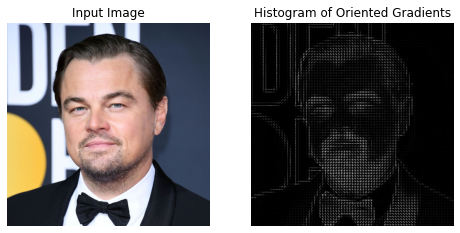

In [ ]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data,exposure
import cv2

#read image from disk
image=cv2.imread('leo.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

#fd is the feature-descriptor (used to represent the image)
fd,hog_image=hog(image, orientations=8, pixels_per_cell=(16,16), cells_per_block=(1,1), visualize=True, multichannel=True)

#plot image and hog image
fig, (ax1, ax2)= plt.subplots(1, 2, figsize=(8,4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image,cmap=plt.cm.gray)
ax1.set_title('Input Image')

#Rescale histogram for better display
hog_image_rescaled= exposure.rescale_intensity(hog_image, in_range=(0,10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled,cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [ ]:
len(fd)

45000

In [ ]:
image.shape

(1200, 1200, 3)

Face Detection

In [ ]:
import face_recognition

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

import numpy as np
import cv2
%matplotlib inline

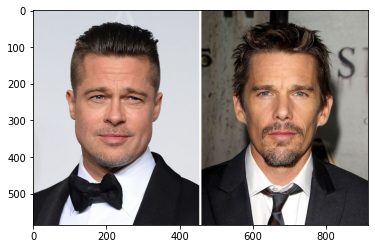

In [ ]:
#Load jpg into a numpy array
image=cv2.imread('brad_ethan.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [ ]:
#Find all faces in the image

face_locations=face_recognition.face_locations(image)

number_of_faces=len(face_locations)
print("Found {} face(s) in Input image".format(number_of_faces))

Found 2 face(s) in Input image


Rectangle around the face for Face Detection

A face is located at pixel location Left: 117 Top: 192 Right: 340 Bottom: 415
A face is located at pixel location Left: 563 Top: 167 Right: 786 Bottom: 390


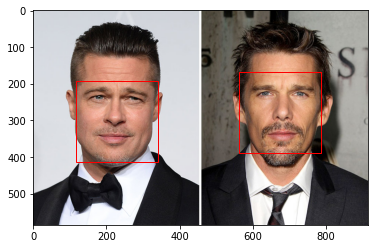

In [ ]:
#get axis handle
plt.imshow(image)
ax=plt.gca()

#repeat for all faces found
for face_location in face_locations:
  
  #print the location of each face in this image; Each face is a list of co-ordinates in top-right-bottom-left corner
  top, right, bottom, left= face_location
  x, y, w, h= left, top, right, bottom

  print("A face is located at pixel location Left: {} Top: {} Right: {} Bottom: {}".format(x, y, w, h))  

  #Drawing a box around the face
  rect=Rectangle((x, y), w-x, h-y, fill=False, color='red')
  ax.add_patch(rect)

#show output image
plt.show()

Face Recognition

In [ ]:
import face_recognition

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

import numpy as np
import cv2
%matplotlib inline

In [ ]:
#Load the known images (Basically creating a Database)

#Image of Brad Pitt
image=cv2.imread('brad.jpg')
brad=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#Image of Ethan Hawke
image=cv2.imread('Ethan.jpg')
Ethan=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#Image of Leonardo DiCaprio
image=cv2.imread('leo.jpg')
leo=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
#Get the face encoding of each person. This can fail if no one is found in the picture

brad_encoding= face_recognition.face_encodings(brad)[0]
Ethan_encoding= face_recognition.face_encodings(Ethan)[0]
leo_encoding= face_recognition.face_encodings(leo)[0]


#create a database of our collection of images encodings

known_face_encodings=[
      brad_encoding,
      Ethan_encoding,
      leo_encoding
]

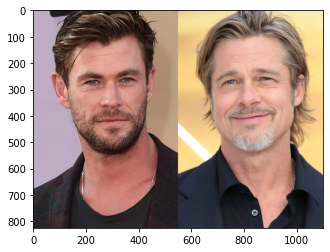

In [ ]:
#Load the image you want to check
image=cv2.imread('brad_chris.jpg')
unknown_image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)

#face encoding for the unknown image
unknown_image_encodings= face_recognition.face_encodings(unknown_image)

In [ ]:
from scipy.spatial import distance

#There might be more than one person in the photo, so we need to loop over each face
for unknown_image_encoding in unknown_image_encodings:

  #Compute euclidean distance or using direct one-line-implementation
  results= face_recognition.compare_faces(known_face_encodings, unknown_image_encoding, tolerance=0.6)

  name="Unknown"

  if results[0]:
    name="Brad Pitt"
  elif results[1]:
    name="Ethan Hawke"
  elif results[2]:
    name="Leonardo DiCaprio"

  print(f"Found {name} in this photo!!")

Found Unknown in this photo!!
Found Brad Pitt in this photo!!


Facial Landmarks (68 point face landmark model)

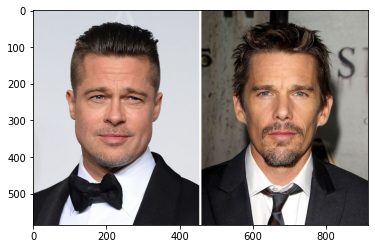

In [ ]:
#Load jpg into a numpy array
image=cv2.imread('brad_ethan.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [ ]:
#Find all facial features in the image
face_landmarks_list=face_recognition.face_landmarks(image)

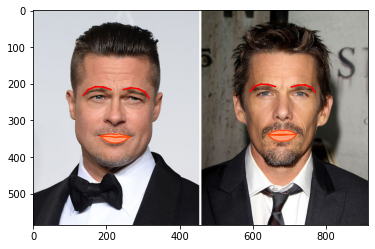

In [ ]:
import matplotlib.lines as mlines
from matplotlib.patches import Polygon

plt.imshow(image)
ax=plt.gca()

for face_landmarks in face_landmarks_list:
  # The face landmark detection model returns these features:
  # chin, left-eyebrow, right-eyebrow, nose-bridge, nose-tip, left-eye, right0eye, top-lip, bottom-lip

  #Draw a line over the eyebrows
  left_eyebrow_pts= face_landmarks['left_eyebrow']
  pre_x, pre_y= left_eyebrow_pts[0]

  for(x,y) in left_eyebrow_pts[1:]:
    l=mlines.Line2D([pre_x,x], [pre_y,y], color='red')
    ax.add_line(l)
    pre_x, pre_y= x, y

  right_eyebrow_pts= face_landmarks['right_eyebrow']
  pre_x, pre_y= right_eyebrow_pts[0]

  for(x,y) in right_eyebrow_pts[1:]:
    l=mlines.Line2D([pre_x,x], [pre_y,y], color='red')
    ax.add_line(l)
    pre_x, pre_y= x, y

  p=Polygon(face_landmarks['top_lip'], facecolor='lightsalmon', edgecolor='orangered')
  ax.add_patch(p)
  p=Polygon(face_landmarks['bottom_lip'], facecolor='lightsalmon', edgecolor='orangered')
  ax.add_patch(p)

#Final Image
plt.show()